# Image Pooling with `reposition_image`

The `reposition_image` function provides a flexible way to transform images by applying combinations of flipping, rotating, and shifting. 

This tutorial will guide you through the various functionalities of `reposition_image` with examples for grayscale and RGB images. Let's dive in!

## Importing Necessary Libraries
First, we will need to import the necessary libraries and load a grayscale and color (RGB) image to manipulate. We will use [`matplotlib`](https://matplotlib.org/stable/api/pyplot_summary.html) to display images and [`numpy`](https://numpy.org/) for array manipulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sharpedge.reposition_image import reposition_image

## Preparing Your Image

We'll define the sample images from [`skimage` library](https://scikit-image.org/docs/stable/api/skimage.html). The grayscale image used is the [`cell` image](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cell),and the RGB image used is the [`cat` image](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cat)

### Example 1: Grayscale Image

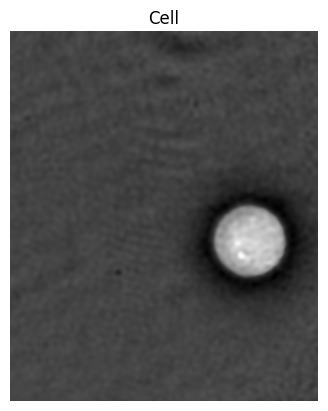

In [21]:
# Load the cell grayscale image from scikit-image
grayscale_img = data.cell()

# Display the image
plt.imshow(grayscale_img, cmap="gray")
plt.title("Cell")
plt.axis("off")
plt.show()

In [22]:
# Display shape and exact numpy array
print(f'Cell gray image in 2D: {np.shape(grayscale_img)}')
print(grayscale_img)

Cell gray image in 2D: (660, 550)
[[71 71 72 ... 73 75 76]
 [71 71 71 ... 73 75 76]
 [71 71 71 ... 73 75 76]
 ...
 [68 68 68 ... 60 60 61]
 [68 68 68 ... 59 60 61]
 [68 68 68 ... 59 60 61]]


### Example 2: RGB Image

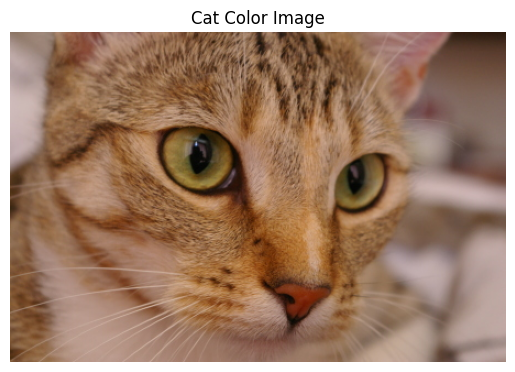

In [23]:
# Load the cat color image from scikit-image
rgb_img = data.cat()

# Display the image
plt.imshow(rgb_img)
plt.title("Cat Color Image")
plt.axis('off') 
plt.show()

In [24]:
# Display shape and exact numpy array
print(f'Cat color image in 3D: {np.shape(rgb_img)}')
print(rgb_img)

Cat color image in 3D: (300, 451, 3)
[[[143 120 104]
  [143 120 104]
  [141 118 102]
  ...
  [ 45  27  13]
  [ 45  27  13]
  [ 45  27  13]]

 [[146 123 107]
  [145 122 106]
  [143 120 104]
  ...
  [ 46  29  13]
  [ 45  29  13]
  [ 47  30  14]]

 [[148 126 112]
  [147 125 111]
  [146 122 109]
  ...
  [ 48  28  17]
  [ 49  29  18]
  [ 50  30  19]]

 ...

 [[ 92  58  30]
  [105  71  43]
  [132  98  71]
  ...
  [172 145 138]
  [172 145 138]
  [172 145 138]]

 [[128  92  60]
  [139 103  71]
  [134  95  64]
  ...
  [166 142 132]
  [166 142 132]
  [167 143 133]]

 [[139 103  71]
  [127  88  57]
  [125  86  53]
  ...
  [161 137 127]
  [161 137 127]
  [162 138 128]]]


## Applying the `reposition_image` Function
We can now apply the `reposition_image` function to perform transformations on grayscale and RGB images. You can customize `flip` to flip the image, `rotate` to rotate the image, `shift_x` to shift the image on its x axis, and `shift_y` to shift the image on its y axis.

### Applying Horizontal Flip to the Grayscale Image
Let's apply a horizontal flip to the grayscale image using `flip` = 'horizontal' for this example.

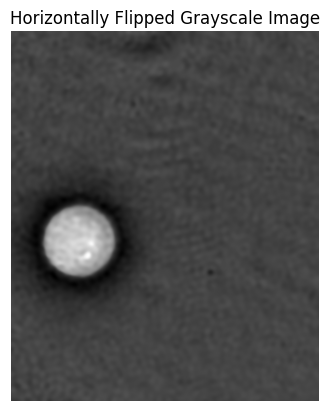

In [26]:
# Apply pooling to the grayscale image
flipped_grayscale_img = reposition_image(grayscale_img, flip='horizontal')

plt.imshow(flipped_grayscale_img, cmap='gray')  
plt.title('Horizontally Flipped Grayscale Image')
plt.axis('off')  
plt.show()

### Applying Horizontal & Vertical Flip to the RGB Image
Let's apply both a horizontal and a vertical flip to the RGB image using `flip` = 'both' for this example.

In [28]:
# Apply pooling to the RGB image
flipped_rgb_img = reposition_image(rgb_img, flip='both')

plt.imshow(pooled_rgb_img)  
plt.title('Horizontally & Vertically Flipped RGB Image')
plt.axis('off')  
plt.show()

print(f'The original shape of the image was:{np.shape(rgb_img)} \nAfter pooling using the mean pooling method with a window size of 8x8, the new shape of the image is: {np.shape(flipped_rgb_img)}')

ValueError: too many values to unpack (expected 2)

In [33]:
def repo_image(img, flip='none', rotate='up', shift_x=0, shift_y=0):
    # Input validation
    #Utility._input_checker(img)

    # Validate flip
    valid_flips = ["none", "horizontal", "vertical", "both"]
    if flip not in valid_flips:
        raise ValueError("flip must be one of 'none', 'horizontal', 'vertical', or 'both'.")

    # Validate rotate
    valid_rotations = ["up", "left", "right", "down"]
    if rotate not in valid_rotations:
        raise ValueError("rotate must be one of 'up', 'left', 'right', or 'down'.")

    # Validate shift_x and shift_y
    if not isinstance(shift_x, int):
        raise TypeError("shift_x must be an integer.")
    if not isinstance(shift_y, int):
        raise TypeError("shift_y must be an integer.")

    # Get image dimensions
    img_height, img_width, _ = img.shape  # Account for the color channels
    
    # Check if shift values are larger than image dimensions and issue a warning if necessary
    if shift_x >= img_width or shift_y >= img_height:
        warnings.warn(f"Shift values ({shift_x}, {shift_y}) are larger than the image dimensions.", UserWarning)

    # Perform flipping
    if flip == "horizontal":
        img = np.fliplr(img)
    elif flip == "vertical":
        img = np.flipud(img)
    elif flip == "both":
        img = np.fliplr(np.flipud(img))

    # Perform rotation
    if rotate == "left":
        img = np.rot90(img, k=1)
    elif rotate == "right":
        img = np.rot90(img, k=-1)
    elif rotate == "down":
        img = np.rot90(img, k=2)

    # Perform shifting
    img = np.roll(img, shift_x, axis=1)  # Shift along x-axis
    img = np.roll(img, shift_y, axis=0)  # Shift along y-axis

    return img
